**Task 3: Tools for Data Science**


> Tina Garg, Aniket Pokle, Ananya Burli



In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
#features
X_df = df.loc[:, features].values
#target
Y_df = df.loc[:,['target']].values


**Step 1 : Normalisation of the data**

In [3]:
scaler = StandardScaler().fit_transform(X_df)
scaler = pd.DataFrame(scaler)

scaler.head()


,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Step 2: PCA**

In [4]:
pca = PCA(n_components=2)
PC = pca.fit_transform(scaler)
PCA_df = pd.DataFrame(data = PC, columns = ['principal-component-1', 'principal-component-2'])
PCA_df.head()



,principal-component-1,principal-component-2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


**Step 3: Visualisation of PCA**

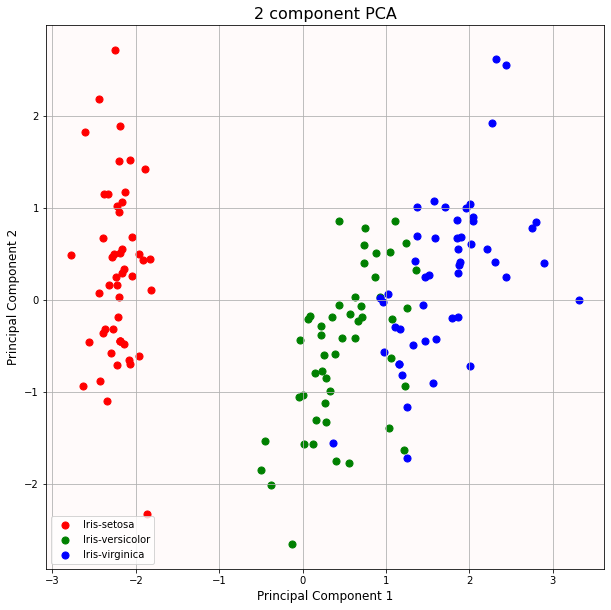

In [5]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 16)
ax.set_facecolor("#FFFAFA")
PCA_plus_target = pd.concat([PCA_df, df[['target']]], axis = 1)
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colours=['r','g','b']
for target, color in zip(targets,colours):
    indicesToKeep = PCA_plus_target['target'] == target
    ax.scatter(PCA_plus_target.loc[indicesToKeep, 'principal-component-1']
               , PCA_plus_target.loc[indicesToKeep, 'principal-component-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Step 4: K-Means on the PCA data**

In [6]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(PCA_df)
#print(labels)

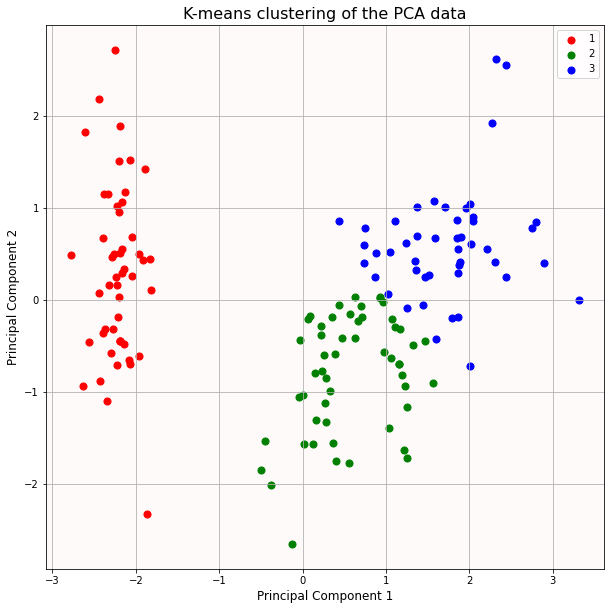

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('K-means clustering of the PCA data', fontsize = 16)
ax.set_facecolor("#FFFAFA")
u_labels= np.unique(labels)
labels_dataset = pd.DataFrame({'label': labels})
PCA_plus_label = pd.concat([PCA_df,labels_dataset[['label']]] , axis = 1)
targets=['1', '2', '3']
colours=['r','g','b']
for l, color in zip(u_labels,colours):
    indicesToKeep = PCA_plus_label['label'] == l
    ax.scatter(PCA_plus_label.loc[indicesToKeep, 'principal-component-1']
               , PCA_plus_label.loc[indicesToKeep, 'principal-component-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Step 5: K-Means on Normalized data**

In [8]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(scaler)

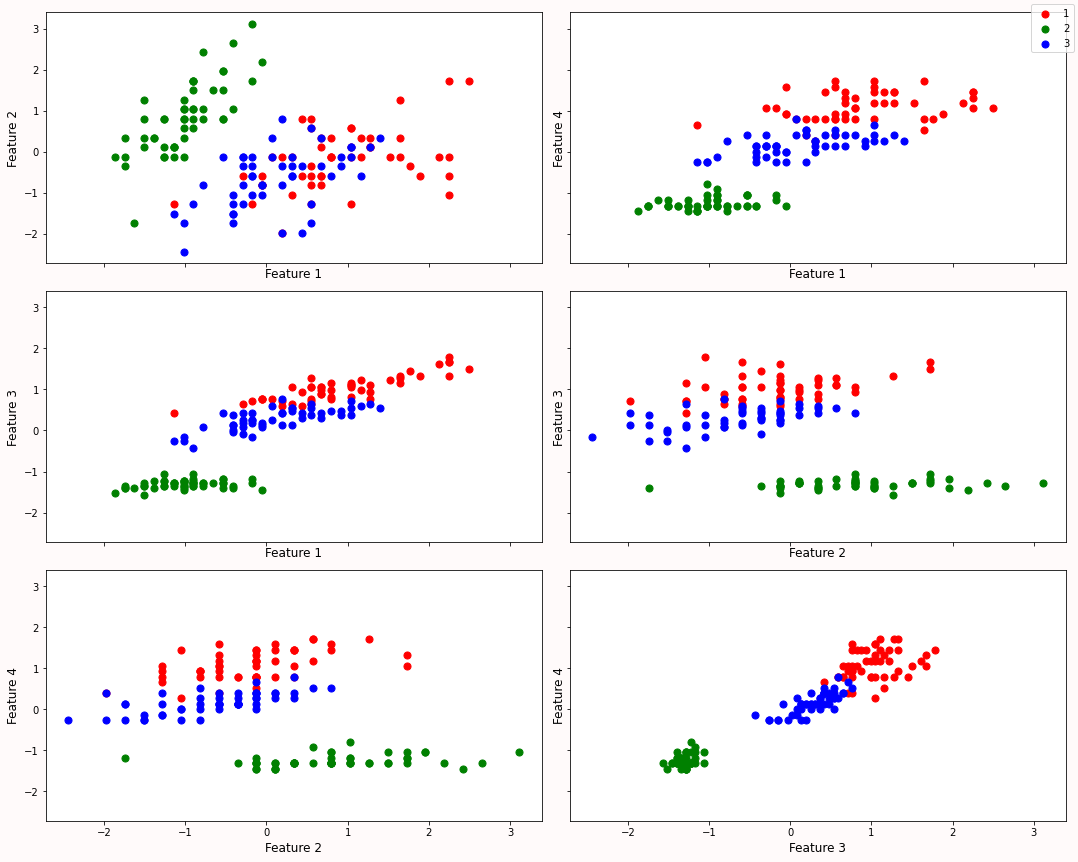

In [9]:
figure, axes = plt.subplots(3, 2, sharey=True, sharex= True, figsize=(15,12))
figure.set_facecolor("#FFFAFA")
axes[0, 0].set_xlabel('Feature 1',fontsize = 12)
axes[0, 0].set_ylabel('Feature 2',fontsize = 12)
axes[1, 0].set_xlabel('Feature 1',fontsize = 12)
axes[1, 0].set_ylabel('Feature 3',fontsize = 12)
axes[0, 1].set_xlabel('Feature 1',fontsize = 12)
axes[0, 1].set_ylabel('Feature 4',fontsize = 12)
axes[1, 1].set_xlabel('Feature 2',fontsize = 12)
axes[1, 1].set_ylabel('Feature 3',fontsize = 12)
axes[2, 0].set_xlabel('Feature 2',fontsize = 12)
axes[2, 0].set_ylabel('Feature 4',fontsize = 12)
axes[2, 1].set_xlabel('Feature 3',fontsize = 12)
axes[2, 1].set_ylabel('Feature 4',fontsize = 12)


scaler_plus_target = pd.concat([scaler, df[['target']]], axis = 1)

targets=['Iris-virginica','Iris-setosa', 'Iris-versicolor', ]
colours=['r','g','b']
for target, color in zip(targets,colours):
    indicesToKeep = scaler_plus_target['target'] == target
    axes[0, 0].scatter(scaler_plus_target.loc[indicesToKeep, 0]
               , scaler_plus_target.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
    axes[1, 0].scatter(scaler_plus_target.loc[indicesToKeep, 0]
               , scaler_plus_target.loc[indicesToKeep, 2]
               , c = color
               , s = 50)
    axes[0, 1].scatter(scaler_plus_target.loc[indicesToKeep, 0]
               , scaler_plus_target.loc[indicesToKeep, 3]
               , c = color
               , s = 50)
    axes[1, 1].scatter(scaler_plus_target.loc[indicesToKeep, 1]
               , scaler_plus_target.loc[indicesToKeep, 2]
               , c = color
               , s = 50)
    axes[2, 0].scatter(scaler_plus_target.loc[indicesToKeep, 1]
               , scaler_plus_target.loc[indicesToKeep, 3]
               , c = color
               , s = 50)
    axes[2, 1].scatter(scaler_plus_target.loc[indicesToKeep, 2]
               , scaler_plus_target.loc[indicesToKeep, 3]
               , c = color
               , s = 50)
figure.legend([1,2,3])
figure.tight_layout()

As we observe, the clustering obtained from K-Means on PCA data as well as on normalised data yielded similar results, which suggests that the use of K-Means for clustering in this case is a good algorithm. The groups classified have been labelled '1', '2' and '3'.

Thank you!